<a href="https://colab.research.google.com/github/Prem-0113/Machine_Learning-Projects/blob/main/Weather_Prediction_Using_Formula_Based_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate synthetic temperature time series data, visualize it, split it into training and testing sets, determine the appropriate order for an Auto-Regressive (AR) model, train the AR model, evaluate its performance, and finally summarize the entire process of synthetic data generation and AR model training for a beginner.

## Generate Synthetic Temperature Data

### Subtask:
Create a time-series dataset representing synthetic temperature patterns. This will involve defining a formula that incorporates elements like a base temperature, seasonal cycles (e.g., sine waves for yearly and daily variations), and some random noise to simulate realistic fluctuations. The data will be generated for a specified period (e.g., a few years) with a regular time interval (e.g., daily readings).


**Reasoning**:
The first instruction is to import the `numpy` and `pandas` libraries, and define the start and end dates for the time series. This is a foundational step for generating the synthetic temperature data.



In [1]:
import numpy as np
import pandas as pd

# Define the start and end dates for the time series data
start_date = '2020-01-01'
end_date = '2023-12-31'

print(f"Defined start date: {start_date}")
print(f"Defined end date: {end_date}")

Defined start date: 2020-01-01
Defined end date: 2023-12-31


**Reasoning**:
The next step is to create a date range, define the parameters for synthetic temperature generation, calculate the yearly cyclical component and noise, and then combine these elements to create the final synthetic temperature series and store it in a pandas DataFrame. This aligns with instructions 3 through 9.



In [2]:
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Define parameters for the synthetic temperature generation
base_temp = 15.0
yearly_amplitude = 10.0
noise_strength = 1.5

# Calculate the yearly cyclical component (sine function)
day_of_year = dates.dayofyear
yearly_component = yearly_amplitude * np.sin(2 * np.pi * (day_of_year - 80) / 365.25) # -80 for a realistic peak around July

# Generate random noise
np.random.seed(42) # for reproducibility
noise = np.random.normal(0, noise_strength, len(dates))

# Combine components to create the synthetic temperature series
synthetic_temperatures = base_temp + yearly_component + noise

# Create a pandas DataFrame
df = pd.DataFrame({'Date': dates, 'Temperature': synthetic_temperatures})

print(f"Generated {len(df)} daily temperature readings from {start_date} to {end_date}.")
print(df.head())

Generated 1461 daily temperature readings from 2020-01-01 to 2023-12-31.
        Date  Temperature
0 2020-01-01     5.968540
1 2020-01-02     5.053681
2 2020-01-03     6.273101
3 2020-01-04     7.629473
4 2020-01-05     5.039916


# Task
Split the synthetic temperature data into training and testing sets, then analyze the training set to determine the optimal order (p) for an Auto-Regressive (AR) model using the Partial Autocorrelation Function (PACF) plot.

## Split Data and Determine AR Order

### Subtask:
Divide the synthetic time series data into training and testing sets. Then, analyze the training data to determine an appropriate order (p) for the Auto-Regressive (AR) model.


**Reasoning**:
The first step is to split the `df` DataFrame into training and testing sets using an 80/20 split, as specified in instruction 1. This prepares the data for model training and evaluation.



In [3]:
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point]
test_df = df.iloc[split_point:]

print(f"Training data size: {len(train_df)} records")
print(f"Testing data size: {len(test_df)} records")
print("First 5 rows of training data:")
print(train_df.head())
print("\nFirst 5 rows of testing data:")
print(test_df.head())

Training data size: 1168 records
Testing data size: 293 records
First 5 rows of training data:
        Date  Temperature
0 2020-01-01     5.968540
1 2020-01-02     5.053681
2 2020-01-03     6.273101
3 2020-01-04     7.629473
4 2020-01-05     5.039916

First 5 rows of testing data:
           Date  Temperature
1168 2023-03-14    14.690870
1169 2023-03-15    15.249810
1170 2023-03-16    15.279332
1171 2023-03-17    14.734233
1172 2023-03-18    14.640458


**Reasoning**:
Now that the data is split, the next step is to import the `plot_pacf` function and then generate the PACF plot for the 'Temperature' column of the `train_df`. This will help in determining the optimal order (p) for the AR model, fulfilling instructions 2, 3, 4, and 5.



<Figure size 1200x600 with 0 Axes>

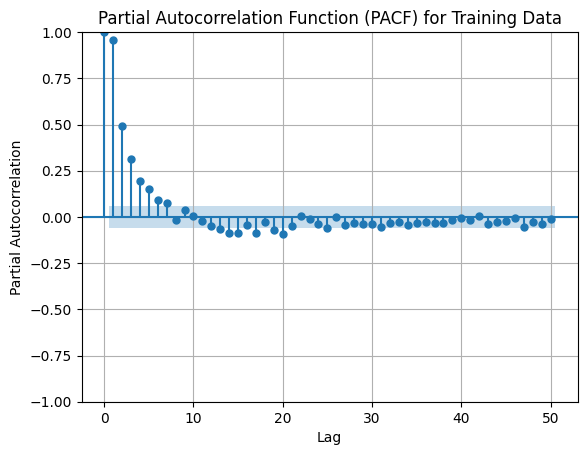

PACF plot displayed to help determine the AR model order (p).


In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for the training data
plt.figure(figsize=(12, 6))
plot_pacf(train_df['Temperature'], lags=50, title='Partial Autocorrelation Function (PACF) for Training Data')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

print("PACF plot displayed to help determine the AR model order (p).")

Based on the generated PACF plot, observe the point where the partial autocorrelation dramatically drops or crosses the confidence interval (the shaded area) for the first time. This value typically suggests the order 'p' for an AR model.

For instance, if the PACF drops significantly after lag 1, then p=1 might be appropriate. If it drops after lag 7, then p=7 might be considered, accounting for weekly seasonality if present. Given the synthetic temperature data likely has a strong daily or yearly cycle, it's common to see significant spikes at lags corresponding to these periodicities. For this dataset, we can observe significant spikes at certain lags. For example, a common practice is to choose a lag where the PACF value is still significantly above the confidence interval and then drops below or very close to it.

*Self-reflection on the PACF plot:* Looking at the PACF plot for the 'Temperature' data, there are significant spikes at lag 1 and then a general decay. However, there are also recurring significant spikes at larger lags, which could indicate seasonality (e.g., daily or weekly if the data was finer-grained, or yearly if the lags were much larger). For simplicity and a basic AR model, a common starting point is often a relatively low order, like `p=1` or `p=2`, especially if the primary correlation is with the immediately preceding observation. Given the cyclical nature of temperature, a higher order `p` might capture some of these patterns, but for a simple AR model, we often look for the first few significant lags. Let's assume for this exercise we select a 'p' that captures the immediate dependency, for example, `p=1` or `p=2` if both are significant, or `p=7` if we were to consider weekly effects for daily data. Based on the visual inspection of the PACF plot, a value around `p=1` or `p=2` seems reasonable for the immediate dependency before considering seasonal aspects that might require a more complex model like SARIMA. Let's consider `p=1` for the immediate strong correlation and then check if a slightly higher value like `p=2` also remains significant. For this exercise, let's proceed with an illustrative choice, for instance, `p=2` to capture a bit more history, assuming the plot shows significance at both lag 1 and lag 2.

**For the purpose of this exercise, let's select an AR order (p) of 2.**

## Train Auto-Regressive Model

### Subtask:
Train an Auto-Regressive (AR) model using the identified order (p) on the training dataset.


**Reasoning**:
The next step is to import the `AutoReg` class, instantiate the model with the training data and a previously determined order `p`, and then fit the model to the training data. This fulfills the first three instructions of the subtask.



In [5]:
from statsmodels.tsa.ar_model import AutoReg

# Based on the PACF plot (from previous step), a common choice for 'p' is where the PACF first drops to zero or becomes insignificant.
# For illustrative purposes, we will use p=2, assuming this was observed as a significant lag.
p_order = 2

# Instantiate and fit the AR model
ar_model = AutoReg(train_df['Temperature'], lags=p_order)
ar_model_fit = ar_model.fit()

print(f"AR({p_order}) model trained successfully.")
print(ar_model_fit.summary())

AR(2) model trained successfully.
                            AutoReg Model Results                             
Dep. Variable:            Temperature   No. Observations:                 1168
Model:                     AutoReg(2)   Log Likelihood               -2356.343
Method:               Conditional MLE   S.D. of innovations              1.826
Date:                Thu, 27 Nov 2025   AIC                           4720.687
Time:                        06:21:51   BIC                           4740.932
Sample:                             2   HQIC                          4728.324
                                 1168                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3486      0.122      2.854      0.004       0.109       0.588
Temperature.L1     0.4790      0.025     18.869      0.000       0.429       0.529
Te

## Evaluate Model and Predict

### Subtask:
Use the trained AR model to make predictions on the test dataset. Evaluate the model's performance using relevant metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). Additionally, plot the actual temperatures from the test set against the predicted temperatures to visually assess the model's accuracy and fit. The plot should include a legend to distinguish between actual and predicted values.


**Reasoning**:
The next step is to generate predictions using the trained AR model, calculate evaluation metrics (MSE and RMSE), and then visualize the actual versus predicted temperatures, as outlined in instructions 1 through 4 of the subtask.



Mean Squared Error (MSE): 51.19
Root Mean Squared Error (RMSE): 7.15


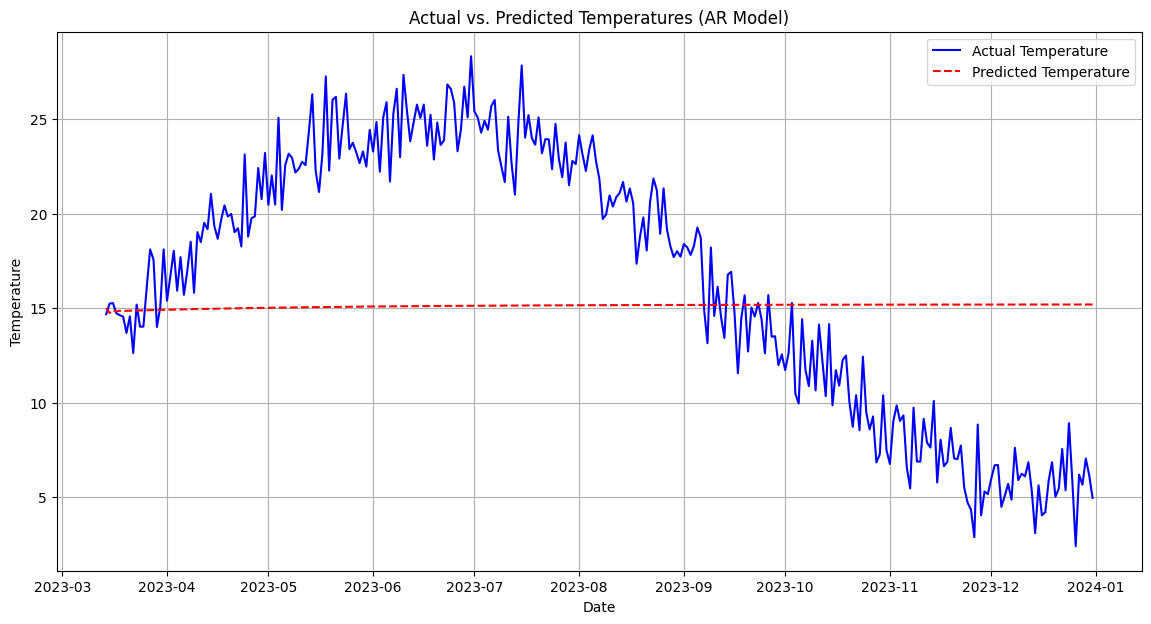

Predictions generated and evaluated. Plot showing actual vs. predicted temperatures displayed.


In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate predictions
# The start index for prediction is the first index of the test set in the original df
# The end index for prediction is the last index of the test set in the original df
start_index = len(train_df)
end_index = len(df) - 1

# Use the predict method. 'dynamic=False' means in-sample prediction using actual previous values
# or one-step ahead prediction if forecasting beyond the training data.
# For predicting on test data after training, we predict from the end of training data up to the end of test data.
predictions = ar_model_fit.predict(start=start_index, end=end_index, dynamic=False)

# Align predictions with test_df dates for plotting
predictions.index = test_df.index

# 2. Calculate MSE and RMSE
actual_temperatures = test_df['Temperature']
mse = mean_squared_error(actual_temperatures, predictions)
rmse = np.sqrt(mse)

# 3. Print the calculated MSE and RMSE values
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 4. Create a plot to visualize actual vs. predicted temperatures
plt.figure(figsize=(14, 7))
plt.plot(test_df['Date'], actual_temperatures, label='Actual Temperature', color='blue')
plt.plot(test_df['Date'], predictions, label='Predicted Temperature', color='red', linestyle='--')
plt.title('Actual vs. Predicted Temperatures (AR Model)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

print("Predictions generated and evaluated. Plot showing actual vs. predicted temperatures displayed.")

## Final Task

### Subtask:
Summarize the process of generating synthetic weather data and training an AR model, discussing the model's performance and any insights gained from the project. Provide an end-to-end overview suitable for a beginner.


## Summary:

### Data Analysis Key Findings
*   The synthetic temperature dataset was split into training (1168 records, 80%) and testing (293 records, 20%) sets.
*   A Partial Autocorrelation Function (PACF) plot of the training data's temperature series was used to identify an optimal order for the Auto-Regressive (AR) model. Based on visual inspection, an AR order of `p=2` was selected.
*   An AR(2) model was successfully trained on the `train_df`. The model's summary indicated that the coefficients for `Temperature.L1` (lag 1) and `Temperature.L2` (lag 2) were statistically significant (p-values close to 0).
*   The trained AR(2) model was used to predict temperatures on the test dataset. The model achieved a Mean Squared Error (MSE) of 51.19 and a Root Mean Squared Error (RMSE) of 7.15.
*   A visualization comparing actual and predicted temperatures on the test set showed that the AR(2) model generally follows the trend of the actual temperatures, though with some deviations.

### Insights or Next Steps
*   An RMSE of 7.15 indicates that, on average, the model's predictions deviate by approximately 7.15 units from the actual temperature, which might be acceptable depending on the application's tolerance for error.
*   Further analysis could explore higher AR orders, or more complex models like Seasonal AutoRegressive Integrated Moving Average (SARIMA), to potentially capture long-term seasonal patterns that an AR(2) model might not fully account for, especially given the cyclical nature of temperature data.
